# Linear Algebra I

In this notebook, we look at some of the fundamental definitions and properties in linear algebra, and implementations in Python and NumPy.

Let us firstly import some useful libraries...

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Basic properties

Vectors and Matrices are two of the most basic and important objects in linear algebra. In most common vector spaces $V$ over some field such as $\mathbb{R}^n$ and $\mathbb{C}^n$, a vector $\vec{v}\in V$ can be viewed as an element in the vector space, and a matrix $A$ can be viewed as an operator which transforms a vectors $\vec{v}\in V$ to $A\vec{v}\in V$. Say $V$ is $\mathbb{C}^n$, then $\vec{v}\in \mathbb{C}^{n}$ is an $n$-dimensional vector, or an $n\times 1$-dimensional array (tensor), and a matrix $A\in \mathbb{C}^{n\times n}$ is an $n\times n$-dimensional array (tensor).

Now we look at some of the most fundamental properties and definitions:
### Transpose
The transpose of a matrix $A\in \mathbb{C}^{n\times m}$ is denoted as $A^T\in \mathbb{C}^{m\times n}$, can be viewed as the reflection of the matrix $A$ along its diagonal, such that 
    \begin{equation}A^T_{ij} = A_{ji}\end{equation}
The same applies to vectors. In NumPy, this can be done using function _numpy.transpose()_, or simply _A.T_ where $A$ is a NumPy array.

### Identity
The identity matrix is a matrix $I\in\mathbb{C}^{n\times n}$ such that $I_{ij} = \delta_{ij}$ where $\delta$ represents the Dirac delta. An $n\times n$ identity matrix can be created using _numpy.eye()_ function.

### Matrix inverse
For a square matrix $A\in \mathbb{C}^{n\times n}$, its matrix inverse, $A^{-1}\in\mathbb{C}^{n\times n}$ is also a square matrix such that
    \begin{equation} AA^{-1} = A^{-1}A = I\end{equation}
One can use _numpy.linalg.inv()_ function for computing the inverse of a square matrix.

Note that computing matrix inverses is in general a difficult task, which can be numerically unstable and computationally expensive. 

### Creating a vector

In Python, they are represented using arrays. For instance, say we have two vectors $\vec{v}$ and $\vec{s}$, defined as:
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}
\begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

Run the cell below to create and visualise vectors $\vec{v}$ and $\vec{s}$:

[-3  2]


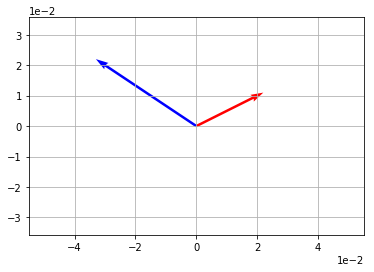

In [1]:
v = np.array([2,1])
s = np.array([-3,2])
print (s)

# Plot v and s
vecs = np.array([v,s])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
plt.show()

One of the most basic thing we could do is vector addition
\begin{equation}\vec{z} = \vec{v}+\vec{s} = \begin{bmatrix}-1 \\ 3 \end{bmatrix}\end{equation}
Let us verify that Python gives the same results:

[-1  3]


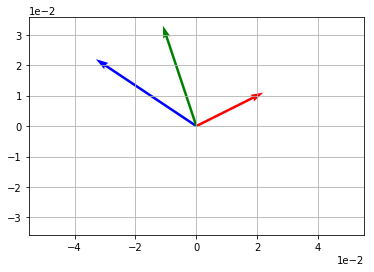

In [5]:
z = v + s
print(z)
vecs = np.array([v,s,z])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b', 'g'], scale=10)
plt.show()

## Vector multiplication

Three types of vector multiplication exist
- Scalar multiplication
- Dot product
- Cross product

### Scalar multiplication
Multiplying a vector by a scalar, which is equivalent to multiply each component of the vector by the same scalar. Assume that we have a vector $\vec{v} = \begin{bmatrix} v_{1}\\v_{2}\end{bmatrix} \in \mathbb{C}^2$. Then multiplying $\vec{v}$ by a scalar $\lambda \in \mathbb{C}$ we have
\begin{equation} \lambda\vec{v} = \lambda\begin{bmatrix} v_{1}\\v_{2}\end{bmatrix} = \begin{bmatrix} \lambda v_{1}\\\lambda v_{2}\end{bmatrix}\end{equation}
Note that division is equivalent to the scalar multiplication with the reciprocal of the divisor, this is allowed since $\mathbb{C}$ is a field, and cannot be done if $\vec{v}\in\mathbb{Z}^{n}$.

### Dot product
In vector spaces, this is also known as inner product, which takes in two vectors in $\mathbb{F}^n$ ($\mathbb{F}$ can be $\mathbb{C}, \mathbb{R}, \dots$), and return a scalar in $\mathbb{F}$ as following
\begin{equation} \vec{v}\cdot\vec{w} = \langle v, w \rangle = \vec{v}^T\vec{w} = \sum_{i=1}^{n}v_{i}w_{i}\end{equation}
In NumPy, dot product can be implemented using numpy.dot() function (note that in Python 3.5 or later, one can use the @ operator for computing the dot product). 

Run the following cell and verify it with your own working of the dot product.

In [9]:
v = np.array([2,1])
s = np.array([-3,2])
d = np.dot(v,s)
print (d)

-4


Note that geometrically, we could interpret dot product as the length of the projection of one vector onto another, i.e., we could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Proof is simple and omitted at this instance.

### Cross product
Cross product of $\vec{v}$ and $\vec{s}$ can be interpreted as finding a vector $\vec{w}$ such that $\vec{w}$ is perpendicular to the two vectors. Hence naturally this can only be done in vector spaces with three or more dimensions. Cross product can be implemented using _numpy.cross()_ function.

## Matrices
We could create a matrix instance similar to creating a vector in NumPy, by creating a two-dimensional NumPy array as following:

In [10]:
A = np.array([[1,2,3],
              [4,5,6]])
print (A)

[[1 2 3]
 [4 5 6]]


One can also use _numpy.matrix()_ to create a matrix as following

In [11]:
M = np.matrix([[1,2,3],
               [4,5,6]])
print (M)

[[1 2 3]
 [4 5 6]]


Both methods are valid for creating the matrix instance, but there are differences in terms of multiplications. In general, most people prefer array object.

Addition, scalar multiplication and dot product can be easily generalised to matrices. Note that disagreement in matrix (or vector) dimensions in matrix (or vector) operations is one of the most common issues that causes bugs, so one should be extremely careful with these!

## Solving linear systems
Note that before we talked about matrix inverses, now we show a simply example of using matrix inverses for solving linear systems.

Consider the following system of equations:

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

We can write this in matrix form, like this:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\qquad (1)\end{equation}

It is clear that this represents the original equations:

\begin{equation}\begin{bmatrix}2x + 4y\\6x + 2y\end{bmatrix} =\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

We denote (1) as 
$$ Ax = y$$
Then we could easily solve the system of linear equations with
$$x = A^{-1}y$$

Run the following code and verify with your own working of the system of equations

In [12]:
A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

C = np.linalg.inv(A) @ B

print(C)

[[5.]
 [2.]]


## Matrix determinant
Determinant is a scalar value computed from the elements of a square matrix. For an $n\times n$ matrix $A$, the general formula for computing its determinant is
$$\text{det}(A) = \sum_{\sigma\in S_{n}}\left(\text{sgn}(\sigma)\prod_{i=1}^{n}a_{i, \sigma(i)}\right)$$
The determinant is commonly denoted using $|A|$. In its simplest form, e.g., when $A\in\mathbb{C}^{2\times 2}$, we could compute its transpose via
$$|A| = \left|\begin{bmatrix} a &b\\c &d\end{bmatrix}\right| = ad-bc$$

Determinant is used throughout linear algebra, for instance, one can determine is an operator (matrix) is singular by simply looking at its determinant; determinant is used for determining the charateristic polynomial of a matrix for computing its eigenvalues; geometrically, determinant represents the signed volume of the $n$-diemensional parallelepipeds spanned by its column (or row) space.

## Vector norms

The conventional Euclidean norm is

$$
\|\boldsymbol{x} \|_{2} = \left( \sum_{i=1}^{n} |x_{i}|^{2} \right)^{1/2}
$$ 

The $l_{p}$-norm,of a vector $\boldsymbol{x} \in \mathbb{C}^{n}$ is 

$$
\| \boldsymbol{x} \|_{p} = \left( \sum_{i=1}^{n} |x_{i}|^{p} \right)^{1/p}
$$

Recall that when $p = \infty$, we have have the maxiumum norm:

$$
\| \boldsymbol{x} \|_{\infty} = \max(|x_{1}|, \ldots , |x_{n}|)
$$



NumPy can compute $l_{p}$ norms of vectors. To see how, we first import NumPy and create a random vectors of length 10:

In [1]:
import numpy as np
np.random.seed(2)

x = np.random.rand(10) + 1j*np.random.rand(10)
print(x)

[0.4359949 +0.62113383j 0.02592623+0.52914209j 0.54966248+0.13457995j
 0.43532239+0.51357812j 0.4203678 +0.18443987j 0.33033482+0.78533515j
 0.20464863+0.85397529j 0.61927097+0.49423684j 0.29965467+0.84656149j
 0.26682728+0.07964548j]


We can now compute a number of $l_{p}$ norms of $\boldsymbol{x}$:

In [2]:
for p in range(1, 5):
    x_norm = np.linalg.norm(x, p)
    print("The l_{} norm of x is: {}".format(p, x_norm))

The l_1 norm of x is: 6.685801095190599
The l_2 norm of x is: 2.202178795407456
The l_3 norm of x is: 1.547749584847131
The l_4 norm of x is: 1.3088747768586464


For the $l_{\infty}$ norm:

In [3]:
 x_inf = np.linalg.norm(x, np.inf)
print("The max norm of x is: {}".format(x_inf))

The max norm of x is: 0.8980307744980834


## Matrix norms

Norms of matrices can also be computed. The more interesting (and abstract) norms are *operator* norms. These are also known as *induced* norms.

### Operator norms

For an $n \times n$ matrix $\boldsymbol{A}$, the norm of the matrix is a measure of the 'maximum change' in relative length it can induce when applied to a vector. If we consider:  

$$
\| \boldsymbol{A}  \boldsymbol{x} \| \le C \| \boldsymbol{x}\| \quad \forall \boldsymbol{x} \in \mathbb{C}^{d},
$$

then the smallest possible $C$ is the norm of $\boldsymbol{A}$. The norm of $\boldsymbol{A}$ is denoted by $\|\boldsymbol{A}\|$:

$$
\| \boldsymbol{A}  \boldsymbol{x} \| \le \| \boldsymbol{A}\| \| \boldsymbol{x}\| \quad \forall \boldsymbol{x} \in \mathbb{C}^{d},
$$

This can be rearranged to provide the usual definition of a matrix norm:

$$
\| \boldsymbol{A} \| = \max_{\boldsymbol{x} \in \mathbb{C}^{n} \backslash \boldsymbol{0}}
    \frac{\| \boldsymbol{A} \boldsymbol{x}\|}{\|\boldsymbol{x}\| }
$$

To compute actual norms of a matrix, we need to choose how we measure the length of a vector, i.e. which norm to use. If we choose the $l_{2}$-norm, then:

$$
\| \boldsymbol{A} \|_{2} = \max_{\boldsymbol{x} \in \mathbb{C}^{n} \backslash \boldsymbol{0}}
    \frac{\| \boldsymbol{A} \boldsymbol{x}\|_{2}}{\|\boldsymbol{x}\|_{2} }
$$

As discussed in the lectures, some norms are relatively inexpensive to compute for large matrices, and others are expensive. We can again use NumPy to compute some matrix norms. We first create a matrix filled with random numbers:

In [4]:
A = np.random.rand(5, 5) + 1j*np.random.rand(5, 5)
print(A)

[[0.50524609+0.42754596j 0.0652865 +0.43674726j 0.42812233+0.77655918j
  0.09653092+0.53560417j 0.12715997+0.95374223j]
 [0.59674531+0.54420816j 0.226012  +0.08209492j 0.10694568+0.3663424j
  0.22030621+0.8508505j  0.34982629+0.40627504j]
 [0.46778748+0.02720237j 0.20174323+0.24717724j 0.64040673+0.06714437j
  0.48306984+0.99385201j 0.50523672+0.97058031j]
 [0.38689265+0.80025835j 0.79363745+0.60181712j 0.58000418+0.76495986j
  0.1622986 +0.16922545j 0.70075235+0.29302323j]
 [0.96455108+0.52406688j 0.50000836+0.35662428j 0.88952006+0.04567897j
  0.34161365+0.98315345j 0.56714413+0.44135492j]]


and then compute some norms:

In [5]:
print("The 1-norm of A is: {}".format(np.linalg.norm(A, 1)))
print("The 2-norm of A is: {}".format(np.linalg.norm(A, 2)))
print("The max-norm of A is: {}".format(np.linalg.norm(A, np.inf)))

The 1-norm of A is: 4.0707141285209385
The 2-norm of A is: 3.5641387076264954
The max-norm of A is: 4.362031308991134


### Vector-like norms

It sometimes convenient to work with matrix norms that are similar to vector norms. A commonly used matrix norm is the Frobenius norm. It is analogous to the $l_{2}$ norm of a vector, and is defined by:

$$
\|\boldsymbol{A} \|_{F} = \left( \sum_{i}\sum_{i} a_{ij}^{2} \right)^{1/2}.
$$

To compute the Frobenius norm: